In [26]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import json
from typing import List, Dict

### Relations

In [27]:
def read_jsonl_file(filename: str) -> List[Dict]:
    dataset = []
    with open(filename) as f:
        for line in f:
            loaded_example = json.loads(line)
            dataset.append(loaded_example)

    return dataset

In [28]:
data = read_jsonl_file("../data/LAMA/data/ConceptNet/test.jsonl")

In [31]:
relations = [line["pred"] for line in data]

In [35]:
s = set(relations)

In [36]:
s

{'AtLocation',
 'CapableOf',
 'Causes',
 'CausesDesire',
 'Desires',
 'HasA',
 'HasPrerequisite',
 'HasProperty',
 'HasSubevent',
 'IsA',
 'MadeOf',
 'MotivatedByGoal',
 'NotDesires',
 'PartOf',
 'ReceivesAction',
 'UsedFor'}

In [39]:
'IsA' in s

True

## Analysis of LAMA probe results

### For all relations

In [2]:
x_values = [1,10,100]
bert_base_uncased = [15.28, 38.96, 64.90]
base_uncased_houlsby100 = [11.58, 31.34, 57.27]

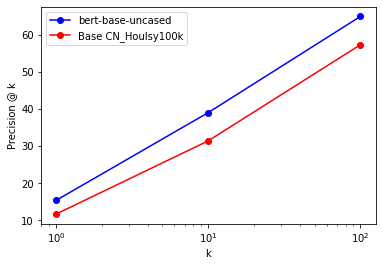

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
line, = ax.plot(x_values,bert_base_uncased, marker='o', color='blue', label="bert-base-uncased")
line, = ax.plot(x_values,base_uncased_houlsby100, marker='o', color='red', label="Base CN_Houlsy100k")
ax.set_xscale('log')
plt.ylabel("Precision @ k")
plt.xlabel("k")
plt.legend()a
plt.show()

# For the IsA relation

In [50]:
base_isA = [19.80, 49.98, 73.36]
adapter_isA = [20.95, 51.15, 76.68]

roberta_isA = [24.12, 55.28, 93.58]
roberta_adapter_isA = [23.56, 59.13, 95.94]

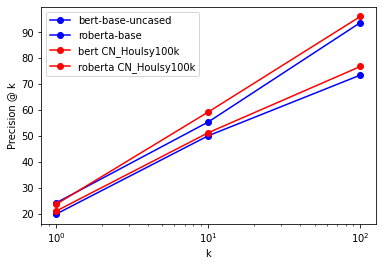

In [52]:
fig = plt.figure()
ax = fig.add_subplot()
line, = ax.plot(x_values,base_isA, marker='o', color='blue', label="bert-base-uncased")
line, = ax.plot(x_values,roberta_isA, marker='o', color='blue', label="roberta-base")
line, = ax.plot(x_values,adapter_isA, marker='o', color='red', label="bert CN_Houlsy100k")
line, = ax.plot(x_values,roberta_adapter_isA, marker='o', color='red', label="roberta CN_Houlsy100k")
ax.set_xscale('log')
plt.ylabel("Precision @ k")
plt.xlabel("k")
plt.legend()
plt.show()